# **Business Case: OLA - Ensemble Learning**

## **About OLA**

Ola is India's **largest mobility platform** and one of the world's largest ride-hailing companies, serving 250+ cities across India, Australia, New Zealand, and the UK. The Ola app offers **mobility solutions** by connecting customers to drivers and a wide range of vehicles across bikes, auto-rickshaws, metered taxis, and cabs, enabling convenience and transparency for hundreds of millions of consumers and over 1.5 million driver-partners.

## **Business Problem**

Recruiting and **retaining** drivers is seen by industry watchers as a tough battle for Ola. **Churn** among drivers is high and it's very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the **high churn** could become a **bigger problem**. To find new drivers, Ola is casting a wide net, including people who don't have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

As a data scientist with the Analytics Department of Ola, focused on driver team attrition. We are provided with the monthly information for a segment of drivers for 2019 and 2020.

### **Our Task is to:**

**Predict** whether a driver will be leaving the company or not based on their attributes like,


*   Demographics (city, age, gender etc.)
*   Tenure information (joining date, Last Date)
*   Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

to maintain a consistent driver base and ensure **business continuity**.

# **1. Exploratory Data Analysis - 1**

In [1]:
#Importing basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
#Downloading and Loading data as pandas dataframe
!wget --no-check-certificate https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv -O ola_driver_scaler.csv
df = pd.read_csv("ola_driver_scaler.csv")

--2024-10-26 10:42:07--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.160.146.45, 18.160.146.106, 18.160.146.187, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.160.146.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1127673 (1.1M) [text/plain]
Saving to: ‘ola_driver_scaler.csv’

ola_driver_scaler.c 100%[===================>]   1.08M   233KB/s    in 6.1s    

2024-10-26 10:42:14 (181 KB/s) - ‘ola_driver_scaler.csv’ saved [1127673/1127673]



In [4]:
#Dataframe
pd.set_option('display.max_columns', 50)
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
#columns
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

### **Column Description**

1. **MMMM-YY** : Reporting Date (Monthly)
2. **Driver_ID** : Unique id for drivers
3. **Age** : Age of the driver
4. **Gender** : Gender of the driver - Male : 0, Female: 1
5. **City** : City Code of the driver
6. **Education_Level** : Education level - 0 for 10+ ,1 for 12+ ,2 for graduate
7. **Income** :Monthly average Income of the driver
8. **Date Of Joining** : Joining date for the driver
9. **LastWorkingDate** : Last date of working for the driver
10. **Joining Designation** : Designation of the driver at the time of joining
11. **Grade** : Grade of the driver at the time of reporting
12. **Total Business Value** : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
13. **Quarterly Rating** : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [6]:
#shape of the dataset
df.shape

(19104, 14)

In [7]:
#data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [8]:
#Number of unique values for each column
for i in df.columns:
  print(i,":",df[i].nunique())

Unnamed: 0 : 19104
MMM-YY : 24
Driver_ID : 2381
Age : 36
Gender : 2
City : 29
Education_Level : 3
Income : 2383
Dateofjoining : 869
LastWorkingDate : 493
Joining Designation : 5
Grade : 5
Total Business Value : 10181
Quarterly Rating : 4


In [9]:
#unique values in categorical column
categorical_column = ["Gender", "Education_Level", "Joining Designation", "Grade", "Quarterly Rating"]
for i in categorical_column:
  print(i,":",df[i].unique())

Gender : [ 0.  1. nan]
Education_Level : [2 0 1]
Joining Designation : [1 2 3 4 5]
Grade : [1 2 3 4 5]
Quarterly Rating : [2 1 4 3]


In [10]:
#Checking unique values in other relevant columns
for i in ["MMM-YY", "Age", "City"]:
  print(i,":",df[i].unique())

MMM-YY : ['01/01/19' '02/01/19' '03/01/19' '11/01/20' '12/01/20' '12/01/19'
 '01/01/20' '02/01/20' '03/01/20' '04/01/20' '08/01/20' '09/01/20'
 '10/01/20' '07/01/19' '08/01/19' '09/01/19' '10/01/19' '11/01/19'
 '04/01/19' '05/01/19' '06/01/19' '05/01/20' '06/01/20' '07/01/20']
Age : [28. 31. 43. 29. 34. 35. 30. 39. 42. 27. 26. nan 33. 40. 41. 32. 22. 44.
 36. 21. 49. 37. 38. 46. 47. 48. 25. 24. 45. 51. 52. 23. 50. 53. 54. 55.
 58.]
City : ['C23' 'C7' 'C13' 'C9' 'C11' 'C2' 'C19' 'C26' 'C20' 'C17' 'C29' 'C10'
 'C24' 'C14' 'C6' 'C28' 'C5' 'C18' 'C27' 'C15' 'C8' 'C25' 'C21' 'C1' 'C4'
 'C3' 'C16' 'C22' 'C12']


In [11]:
#statistical summary
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,19104.0,NaN,NaN,NaN,9551.5,5514.994107,0.0,4775.75,9551.5,14327.25,19103.0
MMM-YY,19104,24,01/01/19,1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driver_ID,19104.0,NaN,NaN,NaN,1415.591133,810.705321,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,NaN,NaN,NaN,34.668435,6.257912,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,NaN,NaN,NaN,0.418749,0.493367,0.0,0.0,0.0,1.0,1.0
City,19104,29,C20,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,19104.0,NaN,NaN,NaN,1.021671,0.800167,0.0,0.0,1.0,2.0,2.0
Income,19104.0,NaN,NaN,NaN,65652.025126,30914.515344,10747.0,42383.0,60087.0,83969.0,188418.0
Dateofjoining,19104,869,23/07/15,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastWorkingDate,1616,493,29/07/20,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#missing value detection
df.isna().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


In [13]:
#Checking Duplicate
df.duplicated().sum()

0

In [14]:
df["Driver_ID"].duplicated().sum()

16723

### **Observations:**
1.	The raw data has **19104 rows** and **14 columns**.
2.	**Date** columns like “MMM-YY”, “Date of Joining” and “LastWorkingDate” has “object” data type.
3.	There is an unwanted column “**Unnamed:0**”. It was probably index of the dataset.
4.	Driver's **mean age** is 34.67, mean **grade** is 2.25 and mean **quarterly rating** is 2.
5.	The data has lots of **missing value** in columns **“LastWorkingDate”** which indicates the drivers who have **not churned** yet. There are some missing values in “Age” and “Gender” column which we may have to address.
6.	There are many **duplicate values** in **“Driver_ID”** column indicating multiple rows belonging the same driver. We will have to **aggregate** rows using **“Driver_ID”** so that we have single training data point corresponding to each driver.


# **2. Data Preprocessing & Feature Engineering**

In [15]:
#Converting Data type of Date related column

df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [16]:
# Dropping irrelevant column "Unnamed: 0"
df.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

### **Handling Missing value using KNN Imputation**

In [18]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5,weights='distance',metric='nan_euclidean')

In [19]:
# Imputing age column
df['Age']=knn.fit_transform(df[['Age']])

In [20]:
# Imputing Gender column with mode
df["Gender"] = df["Gender"].fillna(df["Gender"].mode())

In [21]:
#missing value detection
df.isna().sum()

,0
MMM-YY,0
Driver_ID,0
Age,0
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


### **Data Aggregation**

In [22]:
#creating a copy of unaggregated data frame
df_orig = df.copy(deep=True)

In [23]:
#Aggregating at segment level
#Creating a dictionary named create_segment_dict, that defines how to aggregate and select values.
create_segment_dict = {
    'MMM-YY': 'min',                 # Take the earliest month/year for Reporting Date
    'Age': 'max',                    # Taking max age of the driver
    'Gender': 'first',                # Assuming gender is the same, taking the first value
    'City': 'first',                 # Taking first City Code of the driver
    'Education_Level': 'max',        # Taking highest education level
    'Income': 'sum',                 # Total income over multiple records
    'Dateofjoining': 'min',          # Taking earliest joining date
    'LastWorkingDate': 'max',        # Taking latest last working date
    'Joining Designation': 'max',    # Taking the last designation
    'Grade': 'max',                  # Taking maximum grade
    'Total Business Value': 'sum',   # Total business value over all records
    'Quarterly Rating': 'last'       # Taking last quarterly ratings
    }

In [24]:
#Grouping the data based on Driver_ID and doing aggregation using create_segment_dict
df = df.groupby('Driver_ID').agg(create_segment_dict).reset_index()

In [25]:
df.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,2019-01-01,28.0,0.0,C23,2,172161,2018-12-24,2019-03-11,1,1,1715580,2
1,2,2020-11-01,31.0,0.0,C7,2,134032,2020-11-06,NaT,2,2,0,1
2,4,2019-12-01,43.0,0.0,C13,2,328015,2019-12-07,2020-04-27,2,2,350000,1
3,5,2019-01-01,29.0,0.0,C9,0,139104,2019-01-09,2019-03-07,1,1,120360,1
4,6,2020-08-01,31.0,1.0,C11,1,393640,2020-07-31,NaT,3,3,1265000,2


In [26]:
df.isna().sum()

,0
Driver_ID,0
MMM-YY,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,765
Joining Designation,0


In [27]:
#Creating "TARGET" column "Churned" where 1 indicate driver has churned and 0 will indicate driver has not churned
df['Churned'] = df['LastWorkingDate'].notnull().astype(int)

In [28]:
print(df[['Driver_ID', 'LastWorkingDate', 'Churned']].head())

   Driver_ID LastWorkingDate  Churned
0          1      2019-03-11        1
1          2             NaT        0
2          4      2020-04-27        1
3          5      2019-03-07        1
4          6             NaT        0


## **Outlier detection**

In [29]:
numerical_column = ["Age", "Income", "Total Business Value"]

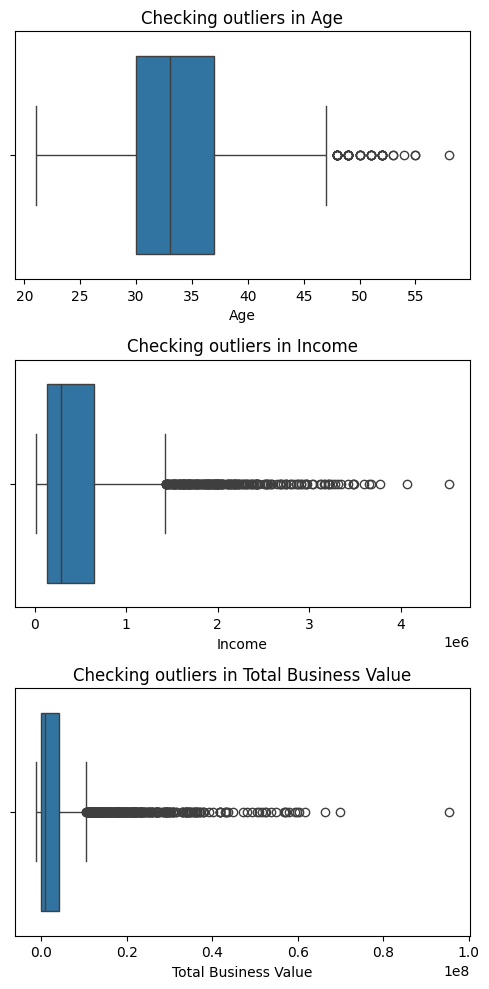

In [30]:
#Outliers visualisation using Boxplots
fig, axes = plt.subplots(3, 1, figsize=(5, 10))
axes = axes.flatten()
for i, ele in enumerate(numerical_column):
    sns.boxplot(x=df[ele], ax=axes[i])
    axes[i].set_title(f"Checking outliers in {ele}")

plt.tight_layout()
plt.show()

## **Outlier Treatment**

In [31]:
#Before outlier treatment
df.shape

(2381, 14)

In [32]:
#Removing outliers using standard deviation (Lets choose 3 std_dev as limit to decide for outlier)
for col in numerical_column:
  mean=df[col].mean()
  std=df[col].std()
  upper = mean + (3*std)
  lower = mean - (3*std)
  df=df[(df[col]<upper) & (df[col]>lower)]

In [33]:
#After outlier treatment
df.shape

(2247, 14)

### **Observations:**
1.	Outliers were observed in **“Income”** and “**Total Business Value**”.
2.	Outliers were treated.
3.	Before the outlier removal number of aggregated rows were **2381** and after the removal of outliers the remaining rows are **2247**.


# **3. Exploratory Data Analysis - 2**

## **Univariate Analysis.**

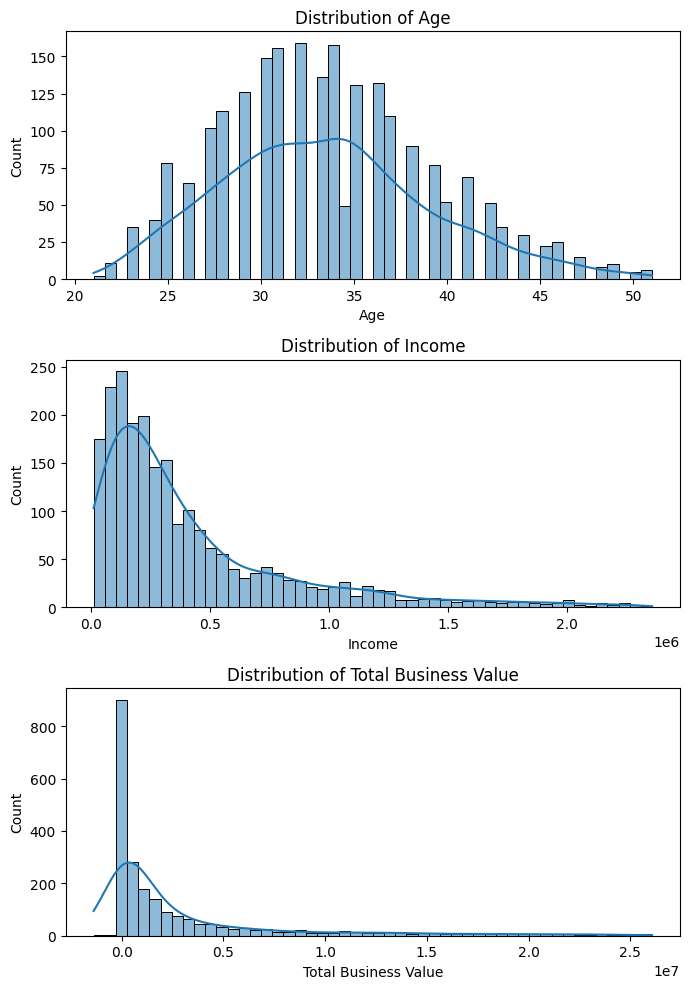

In [34]:
#Plotting Numerical Columns

fig, axes = plt.subplots(3, 1, figsize=(7, 10))
axes = axes.flatten()
for i, ele in enumerate(numerical_column):
  sns.histplot(df[ele], kde=True, bins = 50, ax=axes[i])
  axes[i].set_title(f"Distribution of {ele}")

plt.tight_layout()
plt.show()

### **Observation:**

Both "Income" and "Total Business Value" column data are **Right-Skewed** i.e. the tail is towards the right end.

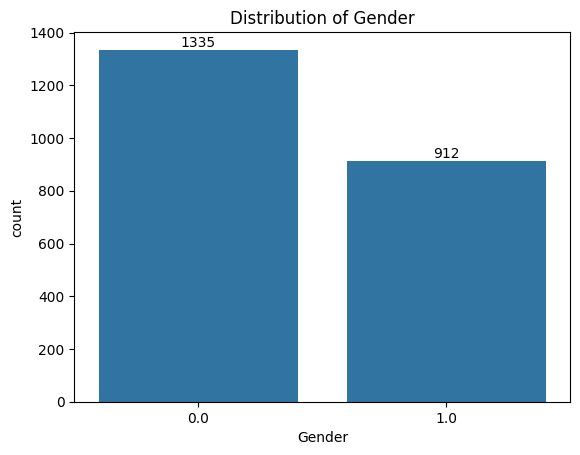

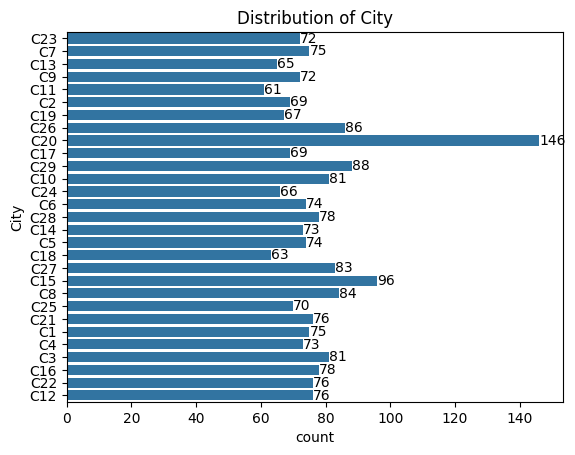

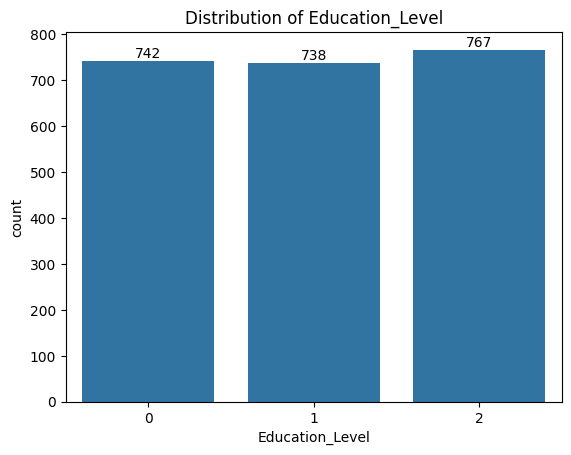

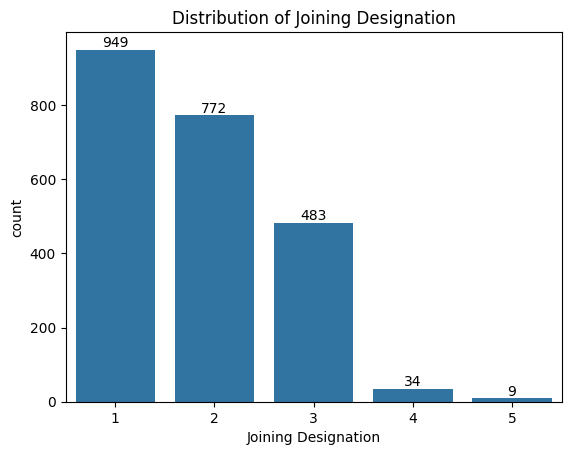

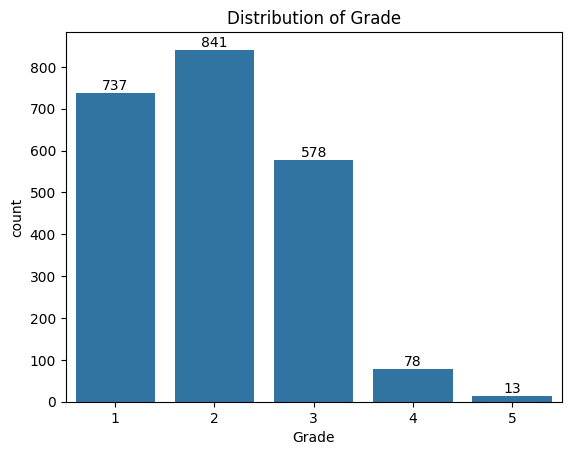

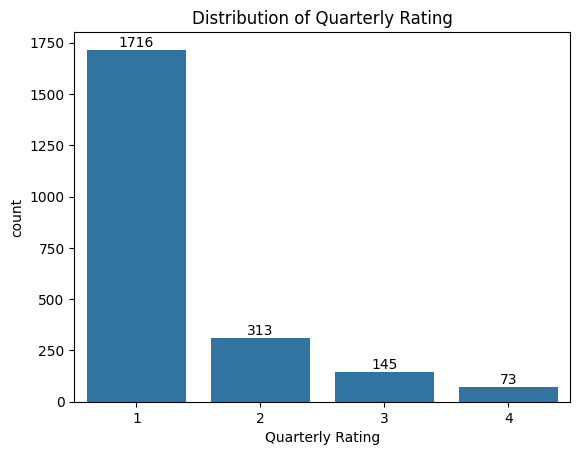

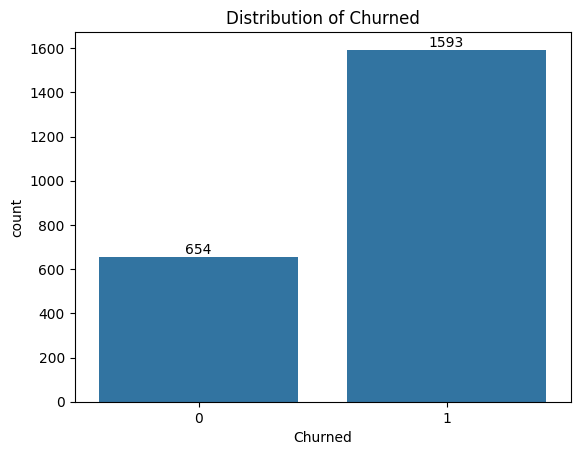

In [35]:
#Plotting Categorical Column

categorical_column = ["Gender", "City", "Education_Level", "Joining Designation", "Grade", "Quarterly Rating", "Churned"]

for ele in categorical_column:
  if (ele in ["City"]):
    ax=sns.countplot(y=df[ele])
    ax.bar_label(ax.containers[0])
    plt.title(f"Distribution of {ele}")
    plt.show()

  else:
    ax=sns.countplot(x=df[ele])
    ax.bar_label(ax.containers[0])
    plt.title(f"Distribution of {ele}")
    plt.show()

In [36]:
df['Churned'].value_counts(normalize=True) * 100

,proportion
Churned,
1,70.894526
0,29.105474


### **Observations:**
1.	Among **Cities**, **C20** has the highest number if driver's count.
2.	Drivers almost uniformly belong from **all** the three **Education Level**.
3.	Most drivers joined the job with **designation 1**.
4.	**Grade** distribution is not uniform, Lower grade of **1 and 2** have far more **greater** count than higher grade of **4 and 5**.
5.	Majority of driver's last Quarterly **Rating** was **1**.
6.	Data is **imbalanced**. **71%** of the data belong to the drivers who have **churned**.  


## **Bivariate Analysis.**

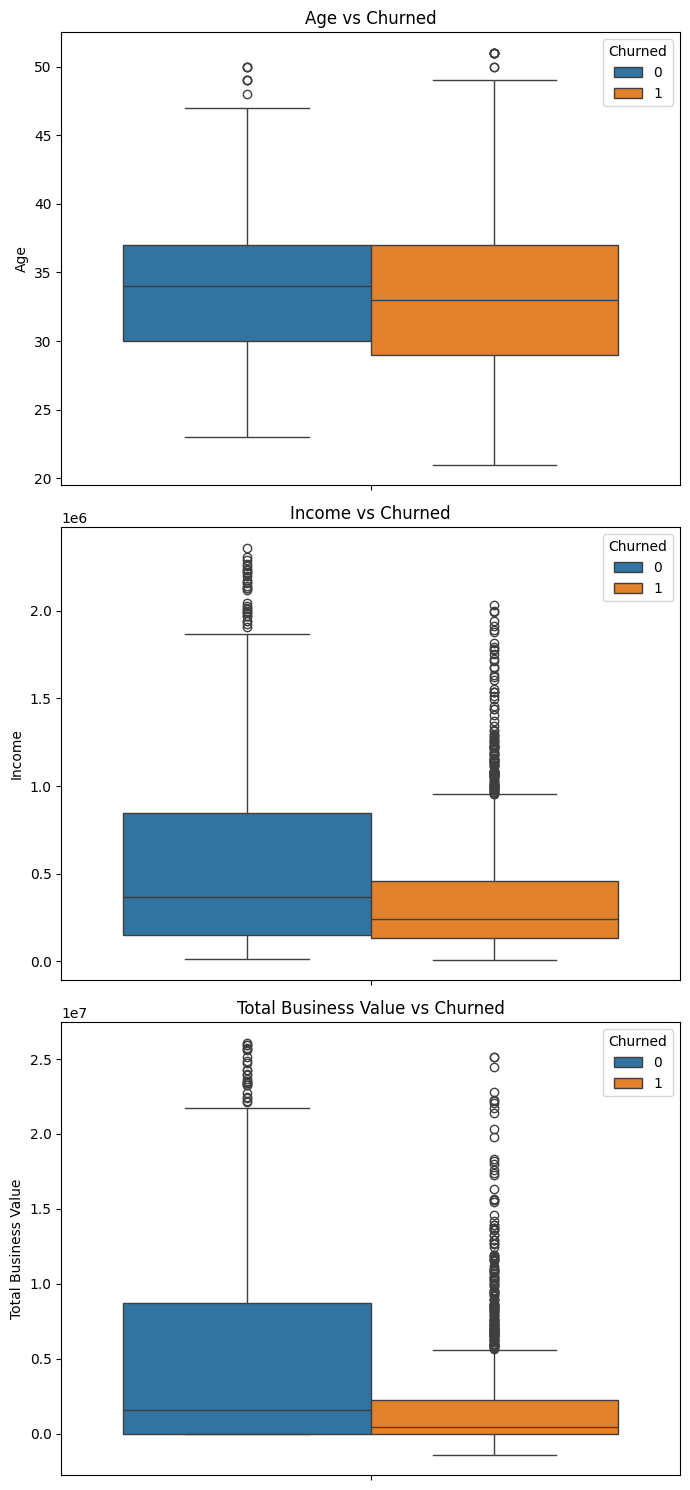

In [37]:
#Plotting Numerical Columns vs Churned

fig, axes = plt.subplots(3, 1, figsize=(7, 15))
axes = axes.flatten()
for i, ele in enumerate(numerical_column):
    sns.boxplot(y=df[ele], ax=axes[i], hue = df["Churned"])
    axes[i].set_title(f"{ele} vs Churned")

plt.tight_layout()
plt.show()

### **Observations:**
1.	It appears from data that drivers with **low Income** are **more likely** to **churn** although there are some outliers which indicates exception cases as well.
2.	Driver with **lower Total Business Value** is **more likely** to **churn** although there are exceptions in this case as well indicated by outliers.
3.	**Age** does not appear to have much impact on churn behavior of drivers although mean age of drivers **churning** is **slightly less** than those who don’t churn.   


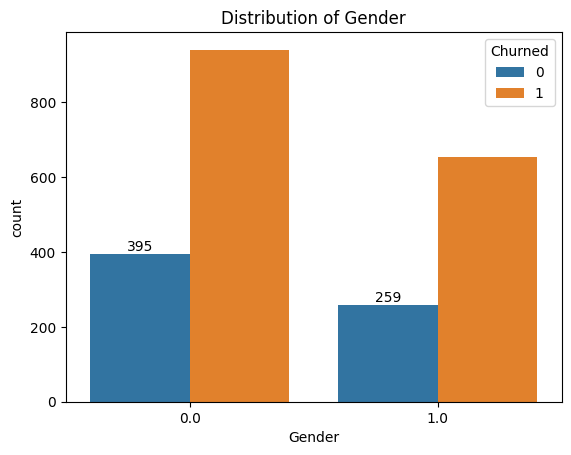

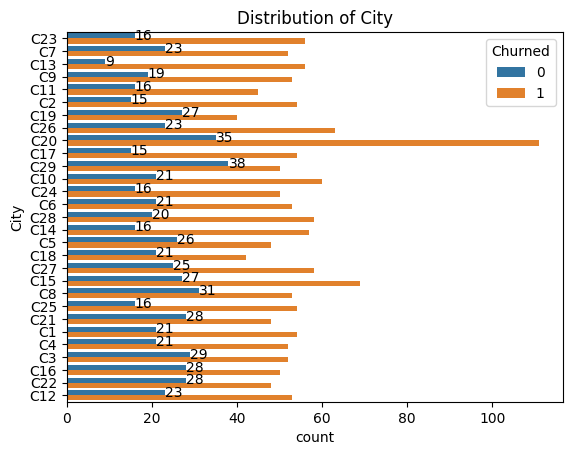

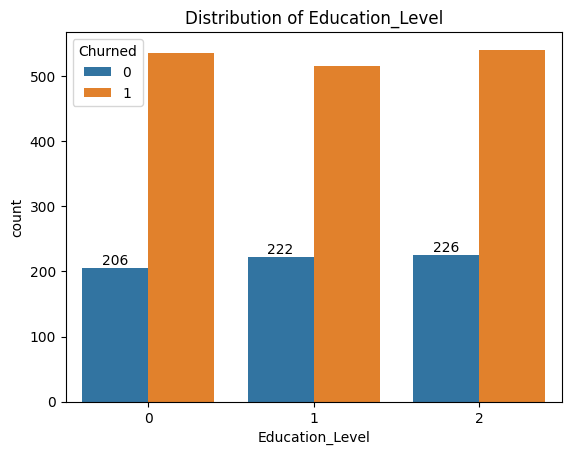

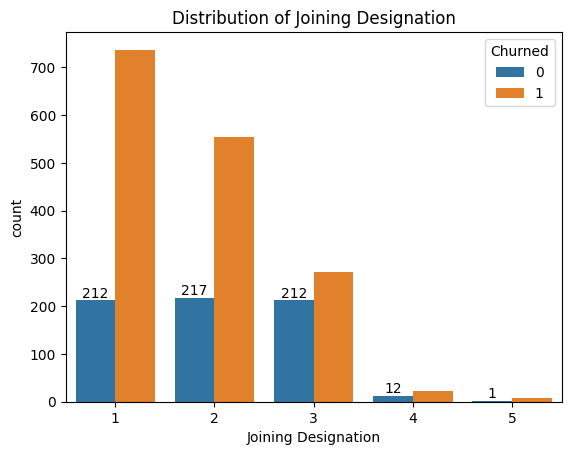

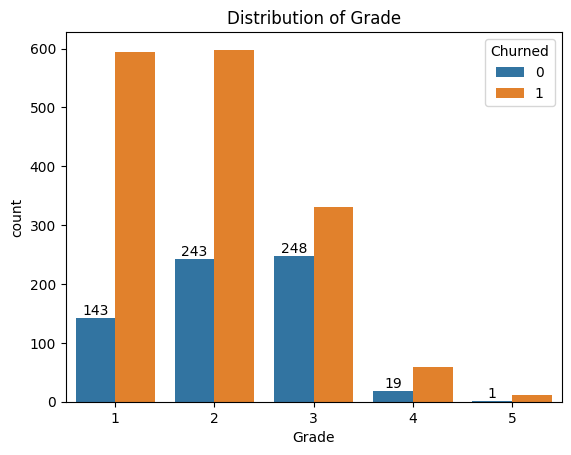

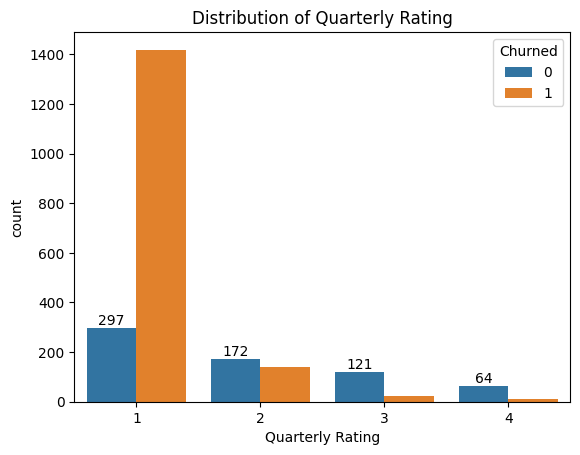

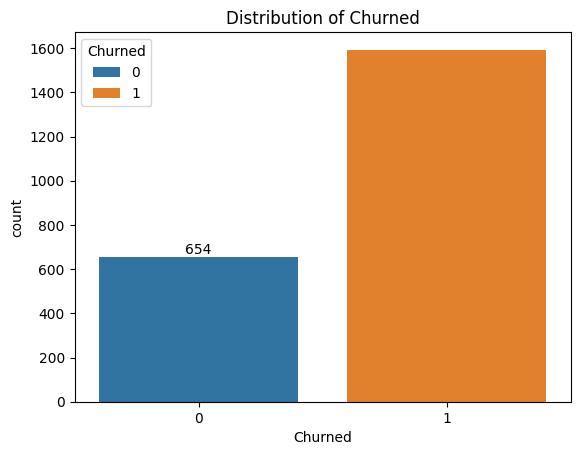

In [38]:
#Plotting Categorical Column vs Churned

for ele in categorical_column:
  if (ele in ["City"]):
    ax=sns.countplot(y=df[ele], hue = df["Churned"])
    ax.bar_label(ax.containers[0])
    plt.title(f"Distribution of {ele}")
    plt.show()

  else:
    ax=sns.countplot(x=df[ele], hue = df["Churned"])
    ax.bar_label(ax.containers[0])
    plt.title(f"Distribution of {ele}")
    plt.show()

### **Observations:**
1.	Drivers from **City C20** appears to be more likely to **churn**.
2.	**Education level** does not have any significant impact on driver's churning behavior.
3.	Drivers whose **Joining Designation** is **1** are **more likely** to **churn** where as those who have Joining Designation as **3** are **least likely** to **churn** comparatively.
4.	Drivers who have **Grade of 1 and 2** at the time of reporting are **more likely** to **churn** than drivers who have **Grade 3** at the time of reporting.
5.	Drives who have **Quarterly Rating as 1** have by far the **highest probability to Churn**.


## **Checking Correlation between Variables.**

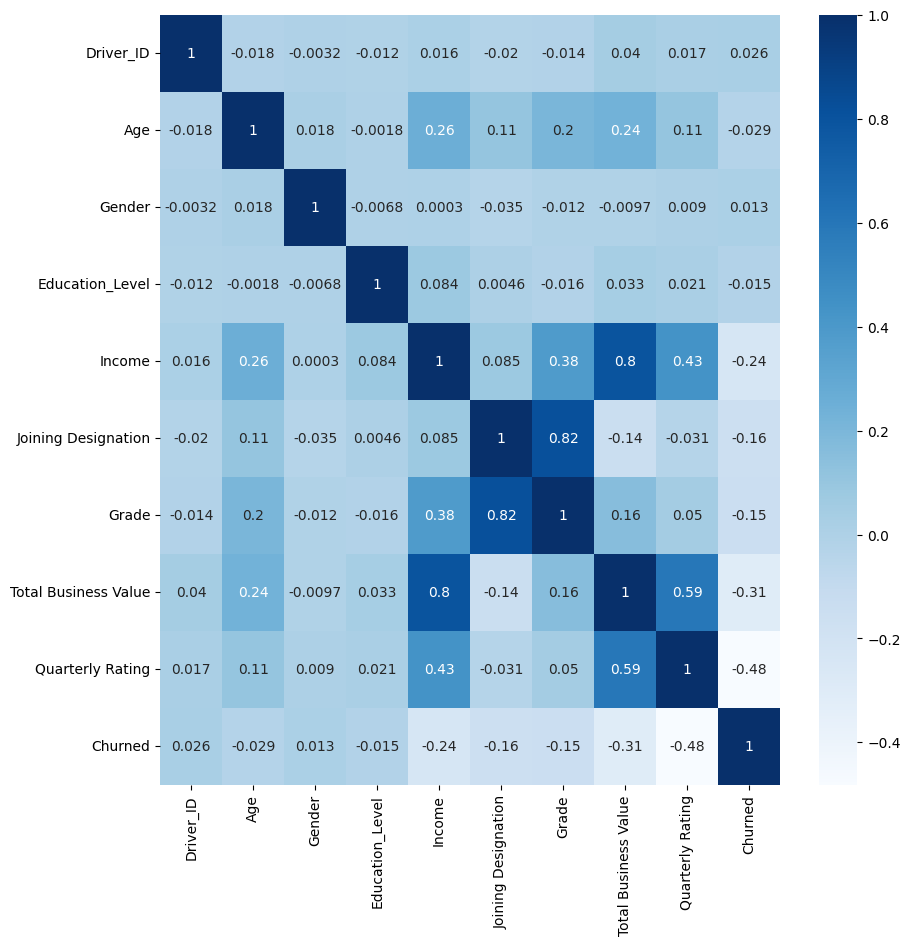

In [39]:
#Plotting Correlation Heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="Blues")
plt.show()

### **Observations:**
1.	Both positive and negative correlation exists between different variables.
2.	Few variables like **“Joining Designation & Grade”** and **“Income & Total Business Vale”** have **high correlation**.
3.	Most of the variables don't have high correlation between them.


# **4. Data preparation for modeling**

In [40]:
# City Encoding
city_mapping = {
    'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5, 'C6': 6, 'C7': 7, 'C8': 8, 'C9': 9, 'C10': 10,
    'C11': 11, 'C12': 12, 'C13': 13, 'C14': 14, 'C15': 15, 'C16': 16, 'C17': 17, 'C18': 18, 'C19': 19, 'C20': 20,
    'C21': 21, 'C22': 22, 'C23': 23, 'C24': 24, 'C25': 25, 'C26': 26, 'C27': 27, 'C28': 28, 'C29': 29
}

# Map the cities using the dictionary
df['City'] = df['City'].map(city_mapping)

In [41]:
# Separating Independent variables and Target variable

X=df.drop(["Churned", "MMM-YY", "Dateofjoining", "LastWorkingDate" , "Driver_ID"],axis=1)
y=df['Churned']

In [42]:
# Spliting data into train, test and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)
print(X_train.shape, y_test.shape)

(1797, 9) (450, 9)
(1797, 9) (450,)


In [43]:
# Scaling data using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_train

array([[ 1.32323385, -0.81479377, -0.50895768, ..., -0.01787426,
         0.03578363, -0.49479706],
       [ 0.44271741,  1.22730442, -0.2699411 , ..., -0.01787426,
        -0.23404688,  2.19145766],
       [-0.61390231, -0.81479377,  1.52268326, ..., -1.16501856,
         2.08954905,  0.8483303 ],
       ...,
       [-0.43779903,  1.22730442,  0.68612523, ..., -1.16501856,
        -0.10912956,  3.53458501],
       [-0.7900056 ,  1.22730442, -0.86748255, ..., -0.01787426,
        -0.53100868, -0.49479706],
       [ 2.20375028,  1.22730442, -1.465024  , ...,  2.27641436,
         1.84895955, -0.49479706]])

### **Balancing Data**

Churned
1    1271
0     526
Name: count, dtype: int64


[]

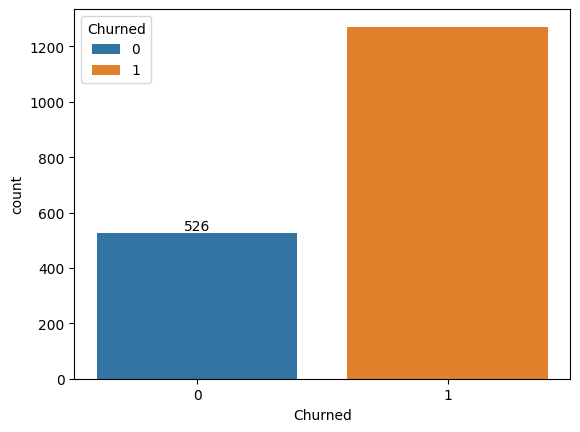

In [45]:
# Checking data imbalance
print(y_train.value_counts())
import seaborn as sns
ax=sns.countplot(x=y_train, hue =y_train)
ax.bar_label(ax.containers[0])
plt.plot()

In [46]:
# Using SMOTE to balance data
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

Churned
1    1271
0    1271
Name: count, dtype: int64


[]

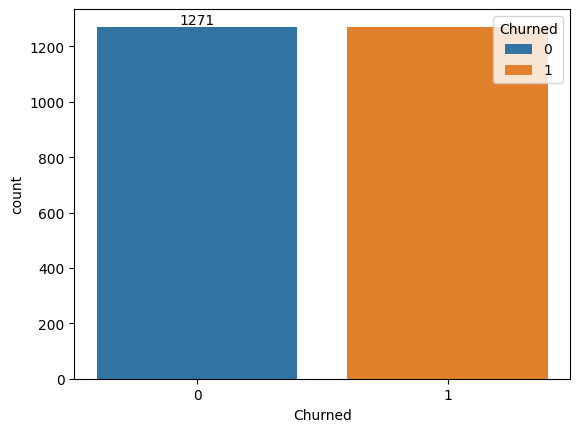

In [47]:
# Checking data imbalance post SMOTE
print(y_sm.value_counts())
import seaborn as sns
ax=sns.countplot(x=y_sm, hue =y_sm)
ax.bar_label(ax.containers[0])
plt.plot()

# **5. Model building and Results Evaluation**

## **i. Ensemble - Bagging Algorithm**

In [48]:
#Choosing "Random Forest" for model building

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 10, 15, 20],
    "max_leaf_nodes" : [20, 40, 80]
}

rfc = RFC(n_jobs = -1)
clf = RandomizedSearchCV(rfc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()
clf.fit(X_train, y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [49]:
#Checking ranking of Model while using diffrent parameters
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 5} Mean_score: 0.8074568725653868 Rank: 6
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 5} Mean_score: 0.8074568725653868 Rank: 6
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 15} Mean_score: 0.8107957707289928 Rank: 2
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 20, 'max_depth': 10} Mean_score: 0.8130217028380634 Rank: 1
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 40, 'max_depth': 15} Mean_score: 0.8057874234835838 Rank: 9
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 20, 'max_depth': 20} Mean_score: 0.8080133555926544 Rank: 5
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 80, 'max_depth': 20} Mean_score: 0.8057874234835838 Rank: 9
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 10} Mean_score: 0.8085698386199222 Rank: 3
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 20} Mean_score: 0.8063439065108514 Rank: 8
Paramete

In [50]:
#Time taken
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:08.937923


In [51]:
#Best Estimator
print(clf.best_estimator_)

RandomForestClassifier(max_depth=10, max_leaf_nodes=20, n_estimators=25,
                       n_jobs=-1)


In [52]:
#Using best parameters to train the final model and checking its accuracy on Test data

rf = clf.best_estimator_

rf.fit(X_train, y_train)

print("Model acc",rf.score(X_test, y_test))

Model acc 0.8022222222222222


The most important feature is: Quarterly Rating with an importance score of: 0.5042


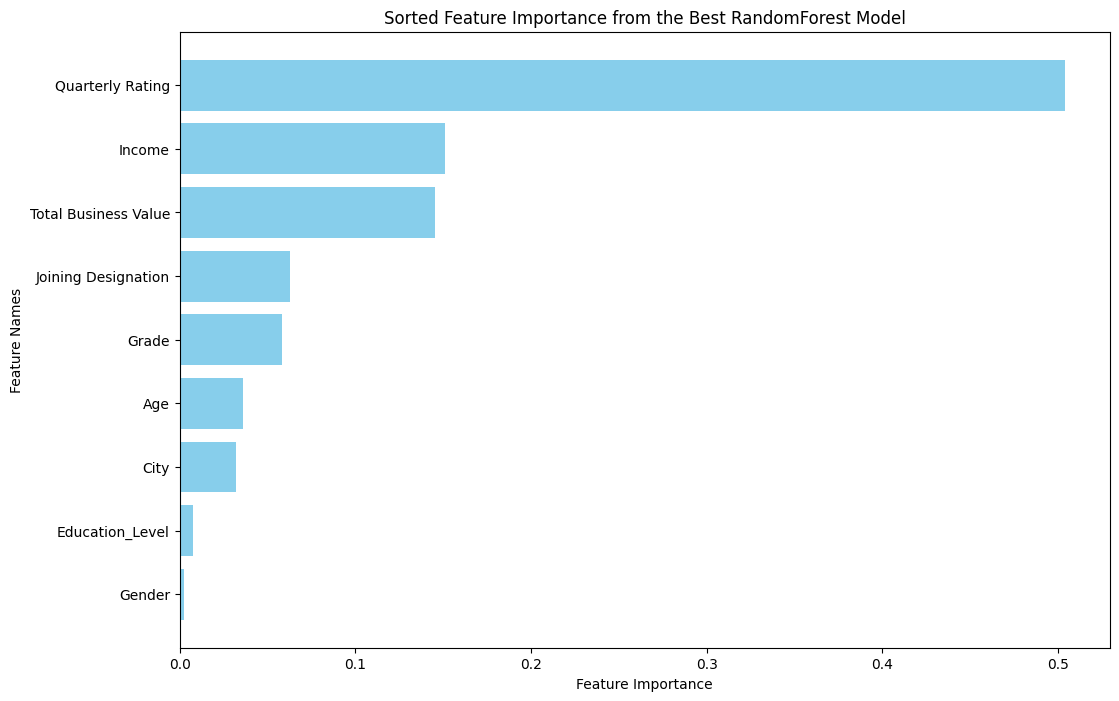

In [53]:
# Getting importance of different Features.
# Getting the best RandomForest model from RandomizedSearchCV
best_rf_model = clf.best_estimator_

# Getting feature importances from the best model
feature_importances = best_rf_model.feature_importances_

# Geting feature names
feature_names = X.columns

# Sorting the features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Printing the most important feature and its importance score
most_important_feature_name = sorted_feature_names[0]
print(f"The most important feature is: {most_important_feature_name} with an importance score of: {sorted_importances[0]:.4f}")

# Ploting all feature importances sorted
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center', color='skyblue')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Sorted Feature Importance from the Best RandomForest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

In [54]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = rf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

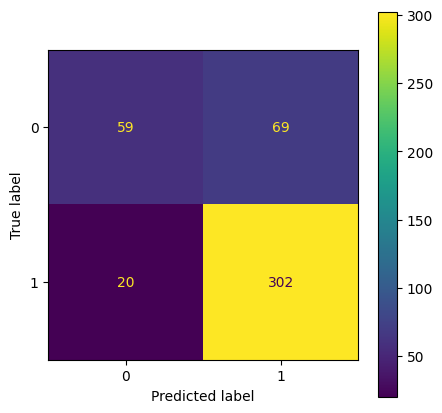

In [55]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)
plt.show()

In [56]:
#Finding Accuracy using Confusion Matrix
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.8022222222222222

In [57]:
#Precision Score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8140161725067385

In [58]:
#Recall Score
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.937888198757764

In [59]:
# F1 Score
from sklearn.metrics import f1_score
print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.8715728715728716


In [60]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.46      0.57       128
           1       0.81      0.94      0.87       322

    accuracy                           0.80       450
   macro avg       0.78      0.70      0.72       450
weighted avg       0.79      0.80      0.79       450



### **Observations:**
**For Ensemble - Bagging Algorithm Model (Random Forest)**
1.	Model **accuracy** is **0.80** (0.7977) which is good accuracy.
2.	The **most important feature** is: **Quarterly Rating** with an importance score of: 0.4932. This we also observed during **EDA** where we made observation that the drives who have Quarterly Rating as 1 have by far the highest probability to Churn.
3.	**Total Business Value**, **Income** and **Joining Designation** are also important features in determining the driver churn.
4.	Model has **Precision Score of 0.81** indicating that when the model predicts a positive case, it is correct 81% of the time.
5.	Model has **Recall Score of 0.93** indicating that the model correctly identifies 93% of all actual positive cases.
6.	The model has **F1 score of 0.87** indicating both precision and recall scores were good.
7.	Classification Report shows that model has **poor** Recall (0.45) and F1 (0.56) score for **negative points** indicating Model performance is not that good in correctly classifying Negative Points.  


## **ROC AUC Curve**

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
probability = rf.predict_proba(X_test)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)

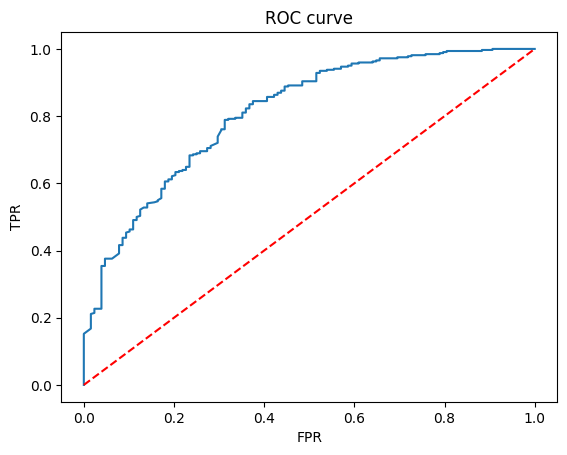

In [62]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [63]:
# AUC
roc_auc_score(y_test,probabilites)

0.8105711374223602

### **Observation:**
Our Model has **AUC of 0.81** indicating that the model is performing well. It means that there's a **81%** chance that the model will be able to **correctly distinguish** between a randomly chosen positive instance and a randomly chosen negative instance.

## **Precision Recall Curve**

In [64]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thr = precision_recall_curve(y_test, probabilites)

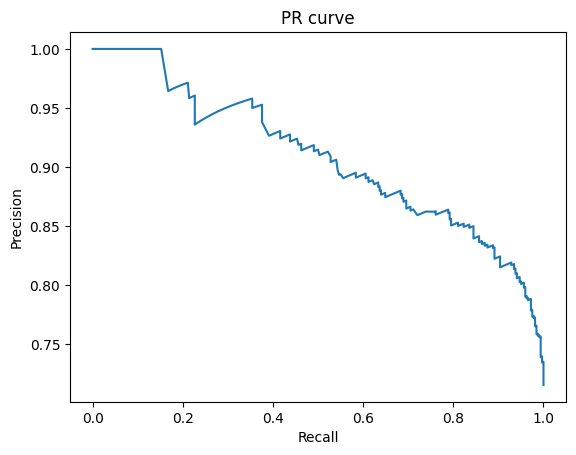

In [65]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [66]:
# Area
auc(recall, precision)

0.9083767920479697

### **Observations:**
1. The area under the **precision-recall curve** (AUC-PR) is **0.91**, which indicates that the model's precision and recall are **balanced**.
2. A score of 0.91 means the model is able to achieve a good **balance** between identifying **actual positives** (high recall) while also maintaining a relatively low number of **false positives** (high precision).

## **ii. Ensemble - Boosting Algorithm**

### **GradientBoostingClassifier**

In [67]:
# Parameters to search from
params = {
    "n_estimators": [50,100,150,200],
    "max_depth" : [3, 4, 5, 7],
    "max_leaf_nodes" : [20, 40, 80],
    "learning_rate": [0.1, 0.2, 0.3]
}

In [68]:
# Finding best parameters
from sklearn.ensemble import GradientBoostingClassifier as GBC
gbc = GBC()
clf = RandomizedSearchCV(gbc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 7],
                                        'max_leaf_nodes': [20, 40, 80],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='accuracy', verbose=1)

In [69]:
#Best Estimator
print(clf.best_estimator_)

GradientBoostingClassifier(max_leaf_nodes=80, n_estimators=150)


In [70]:
# Training Model using best parameters (Best Estimator)
gbc = clf.best_estimator_

gbc.fit(X_train, y_train)

print("Model acc",gbc.score(X_test, y_test))

Model acc 0.7822222222222223


### **Lets check performance other Boosting Algorithm before deciding our final Boosting model.**

### **XGBoost**

In [71]:
# Importing Classifier and defining parameter dictionary to search from
from xgboost import XGBClassifier


params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

In [72]:
# Searching best parameter
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='accuracy', n_jobs=-1, cv=3, verbose=1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 7],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='accuracy', verbose=1)

In [73]:
# Best parameters
print(random_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


In [74]:
# Training XGBoost with best parameters
xgb = random_search.best_estimator_

xgb.fit(X_train, y_train)

print("Model acc",xgb.score(X_test, y_test))

Model acc 0.7866666666666666


### **Choosing XGBoost as our main Boosting algorithm as it has better accuracy than GradientBoosting.**

The most important feature is: Quarterly Rating with an importance score of: 0.5512


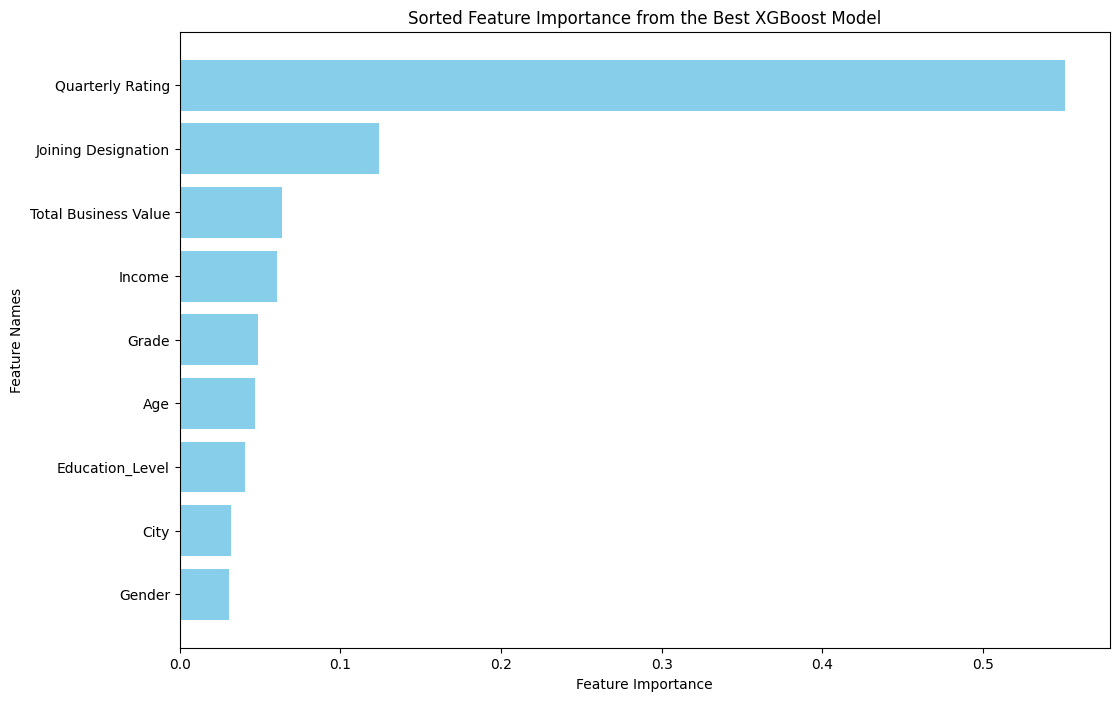

In [75]:
# Getting importance of different Features.

# Getting feature importances from the best model
feature_importances = xgb.feature_importances_

# Geting feature names
feature_names = X.columns

# Sorting the features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Printing the most important feature and its importance score
most_important_feature_name = sorted_feature_names[0]
print(f"The most important feature is: {most_important_feature_name} with an importance score of: {sorted_importances[0]:.4f}")

# Ploting all feature importances sorted
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center', color='skyblue')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Sorted Feature Importance from the Best XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

In [76]:
#Confusion Matrix

y_pred = xgb.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

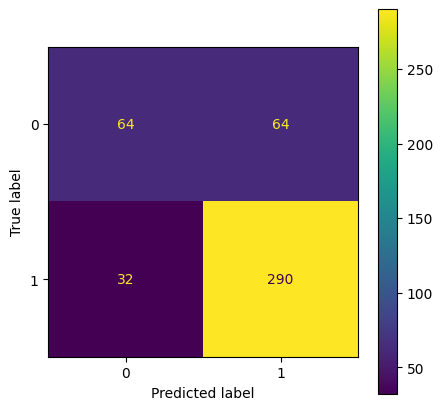

In [77]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)
plt.show()

In [78]:
#Finding Accuracy using Confusion Matrix
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.7866666666666666

In [79]:
#Precision Score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8192090395480226

In [80]:
#Recall Score
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9006211180124224

In [81]:
# F1 Score
from sklearn.metrics import f1_score
print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.8579881656804734


In [82]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57       128
           1       0.82      0.90      0.86       322

    accuracy                           0.79       450
   macro avg       0.74      0.70      0.71       450
weighted avg       0.78      0.79      0.78       450



### **Observations:**
**For Ensemble - Boosting Algorithm Model (XGBoost)**
1.	Model **accuracy** is **0.79** which is good accuracy.
2.	The **most important feature** is: **Quarterly Rating** with an importance score of: 0.6236. This we also observed during **EDA** where we made observation that the drives who have Quarterly Rating as 1 have by far the highest probability to Churn.
3.	**Joining Designation**, **Income** and **Total Business Value** are also important features in determining the driver churn.
4.	Model has **Precision Score of 0.82** indicating that when the model predicts a positive case, it is correct 82% of the time.
5.	Model has **Recall Score of 0.90** indicating that the model correctly identifies 91% of all actual positive cases.
6.	The model has **F1 score of 0.86** indicating both precision and recall scores were good.
7.	Classification Report shows that model has **poor** Recall (0.50) and F1 (0.57) score for **negative points** indicating Model performance is not that good in correctly classifying Negative Points.  


## **ROC AUC Curve**

In [83]:
probability = xgb.predict_proba(X_test)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)

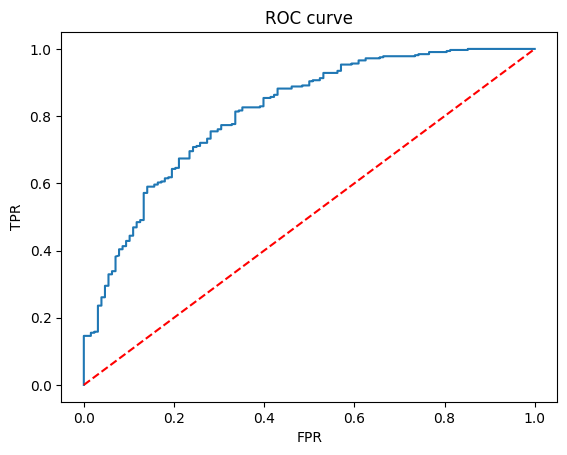

In [84]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [85]:
# AUC
roc_auc_score(y_test,probabilites)

0.8113232725155279

### **Observation:**
Our Model has **AUC of 0.81** indicating that the model is performing well. It means that there's a **81%** chance that the model will be able to **correctly distinguish** between a randomly chosen positive instance and a randomly chosen negative instance.

## **Precision Recall Curve**

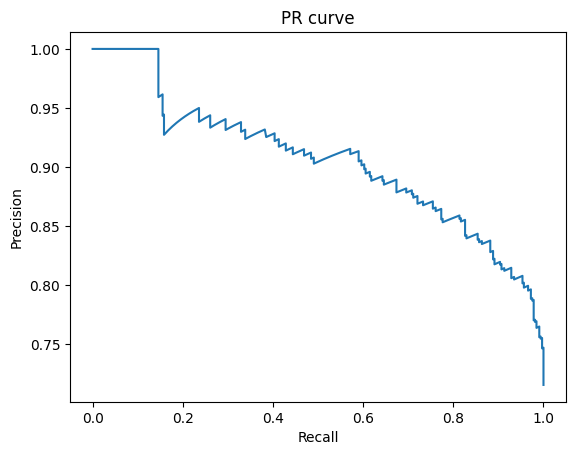

In [86]:
precision, recall, thr = precision_recall_curve(y_test, probabilites)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [87]:
# Area
auc(recall, precision)

0.9053819148886404

### **Observations:**
1. The area under the **precision-recall curve** (AUC-PR) is **0.91**, which indicates that the model's precision and recall are **balanced**.
2. A score of 0.91 means the model is able to achieve a good **balance** between identifying **actual positives** (high recall) while also maintaining a relatively low number of **false positives** (high precision).

# **6. Actionable Insights & Recommendations**

1.	Both of **Random Forest** and **XGBoost** model is performing almost equally good for our given data.
2.	Since **driver churn** is major concern for OLA the created model is going to be **very useful** for OLA in identifying the drivers which have **potential to churn** so that appropriate measures can be taken beforehand to prevent the churn from materializing.
3.	The model can **correctly identify 91%** of the potential churn cases with **82% accuracy** as it has **Recall** Score of **0.91** and **Precision** Score of **0.82**. This will give OLA and opportunity to prevent majority of potential churn cases from materializing.
4.	The model shows that **“Quarterly Rating”** is the **most important** feature while predicting the churn. So, any driver whose **quarterly rating falls** should be placed under **special plan** where OLA tries to **improve** his rating based on **constructive customer feedback**, **reward system** and **training**.
5.	**Joining Designation** is another important feature in predicting the driver churn. During EDA also it was observed that driver who join the job at **lower designation** are **more likely to churn**. Ola should **increase** the proportion of **more experienced** driver with **higher joining designation** as being experienced they are less likely to be impulsive and leave job.
6.	**Income** and **Total Business Value (TBV)** are also among important feature in determining the driver churn. Drivers with **lower income** and lower Total Business Value (**TBV**) are **more likely to churn**. During EDA we observed that there is **strong correlation** between Income and Total Business Value. OLA should **conduct a survey** among drivers with **higher Income** and TBV. Using the gather information should compile a list of **best practices** which will lead to Income growth. Those practices should be shared and advertised among the **lower performing** drivers as **“Best ways to increase your Income with OLA”**. Drivers are likely to adapt those practices as in general everyone want to earn more. Increase in the income of drivers will make them **less likely to churn** also since TBV is **correlated** with income this will also lead to **increase in OLA business**. A **win-win** situation for everyone.


# **7. Questionnaire**

### **1. What percentage of drivers have received a quarterly rating of 5?**

In [95]:
df_orig["Quarterly Rating"].value_counts(normalize = True)*100

,proportion
Quarterly Rating,
1,40.195771
2,29.067211
3,20.388400
4,10.348618


**Ans: No driver has received quarterly rating of 5. So the percentage is 0%.**

### **2. Comment on the correlation between Age and Quarterly Rating.**


In [96]:
df_orig[["Age", "Quarterly Rating"]].corr()

,Age,Quarterly Rating
Age,1.000000,0.171543
Quarterly Rating,0.171543,1.000000


**Ans: There is a very weak positive correlation of 0.17 between Age and Quarterly Rating.**

### **3. Drivers with a Grade of "A" are more likely to have a higher Total Business Value. (T/F)**

In [102]:
df.groupby('Grade')['Total Business Value'].mean()

,Total Business Value
Grade,
1,2.126997e+06
2,2.921399e+06
3,3.117502e+06
4,9.129823e+06
5,5.381469e+05


**Ans: If "Grade A" corresponds to "Grade 5" the statement is True (T) but if "Grade A" corresponds to "Grade 1" the statement is False (F).**

### **4. From Ola's perspective, which metric should be the primary focus for driver retention?**
**1. ROC AUC**
**2. Precision**
**3. Recall**
**4. F1 Score**

### **Ans:**
1. If Ola has **enough resource** then choosing "**Recall**" as primary metric will be important. This will ensure that all the drivers who have potential to churn are identified, so that issue with them can be addressed for **preventing the churn**. But this may cause **waste of resources** and time **on "False positives"**.
2. If the **resources are limited** focusing on the "**Precision**" metric will be more important. This will **minimize** the case of "**False Positive**" and will ensure that the **resources** and time are **not wasted** on the drivers who were not likely to churn anyway. But this may lead the model to **miss out** on the **actual positive** cases thus causing driver churn.
3. Focusing on **F1 matric** will be good idea if we want to find a **middle ground** between above two senarios.

### **5. Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?**

### **Ans:**
Other features that might have a strong impact on a **driver's Quarterly Rating** are:
1. **Customer waiting time**
2. **Car Cleanliness**
3. **Driver Behaviour**
4. **Safe driving practice**